## Load using package

In [2]:
import cv2
import matplotlib.pyplot as plt
import os
import numpy as np
# from sk
from sklearn.linear_model import LogisticRegressionCV

## Load image and ground truth

In [3]:
data_path = '../../../SkinColor/FacePhoto/'
gt_path = '../../../SkinColor/GroundT_FacePhoto/'
file_names = os.listdir(data_path)

In [4]:
data = cv2.imread(f"{data_path}{file_names[0].split('.')[0]}.jpg").reshape(-1, 3)
gt = np.mean(cv2.imread(f"{gt_path}{file_names[0].split('.')[0]}.png").reshape(-1, 3) / 255, axis=-1)
for file in file_names[1:]:
    name = file.split('.')[0]
    img = cv2.imread(f"{data_path}{name}.jpg")
    data = np.concatenate((data, img.reshape(-1, 3)), axis=0)
    gt_img = cv2.imread(f"{gt_path}{name}.png").reshape(-1, 3) / 255
    gt = np.concatenate((gt, np.mean(gt_img, axis=1)), axis=0)

print("Data shape: ", data.shape)
print("Ground truth shape: ", gt.shape)

Data shape:  (5913307, 3)
Ground truth shape:  (5913307,)


## Training all pixel value with Logistic Regresson model

In [5]:
logregr = LogisticRegressionCV()
logregr.fit(data, gt)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


LogisticRegressionCV(Cs=10, class_weight=None, cv='warn', dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=100, multi_class='warn', n_jobs=None,
                     penalty='l2', random_state=None, refit=True, scoring=None,
                     solver='lbfgs', tol=0.0001, verbose=0)

## Test an image

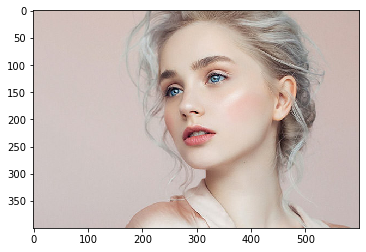

In [11]:
img = cv2.imread("../data/test2.jpg")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

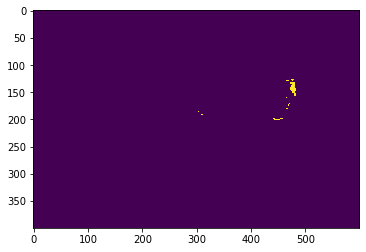

In [12]:
plt.imshow(logregr.predict(img.reshape(-1, 3)).reshape(img.shape[0], img.shape[1]))